# Machine Learning Model Evaluation



*   Model evaluation is the process of assessing how well a machine learning model performs on unseen data using different metrics and techniques.

*   It ensures that the model not only memorizes training data but also generalizes to new situations.
*  we can identify whether a model has truly learned patterns, detect its weaknesses and decide if it is ready for real-world deployment.



# 1. Cross-Validation
Cross-validation ensures that the model is tested on multiple subsets of data making it less likely to overfit and improving its generalization ability.


*   Splitting the dataset into several parts.

*  Training the model on some parts and testing it on the remaining part.


*   Repeating this resampling process multiple times by choosing different parts of the dataset.

*   Averaging the results from each validation step to get the final performance.

## (a) Holdout Method
In the Holdout method the dataset is split into train and test sets (commonly 7:3 or 8:2).


* **train_test_split()** divides data into training and testing sets.
test_size=0.20: 20% for testing, 80% for training.


*   **random_state=42** makes results reproducible
## (b) K-Fold Cross-Validation
In K-Fold Cross-Validation the dataset is divided into k folds. Each fold is used once as a test set and the model is trained on the remaining k-1 folds.


*   **DecisionTreeClassifier()**: A decision tree model is created.

*   **KFold(n_splits=5)**: Data is divided into 5 folds.

*  **cross_val_score()**: Runs training/testing across folds.



*   **scores**: Accuracy for each fold.


*  **scores.mean()**: Average accuracy across all folds.

Example of K Fold Cross Validation
The diagram below shows an example of the training subsets and evaluation subsets generated in k-fold cross-validation. Here we have total 25 instances.
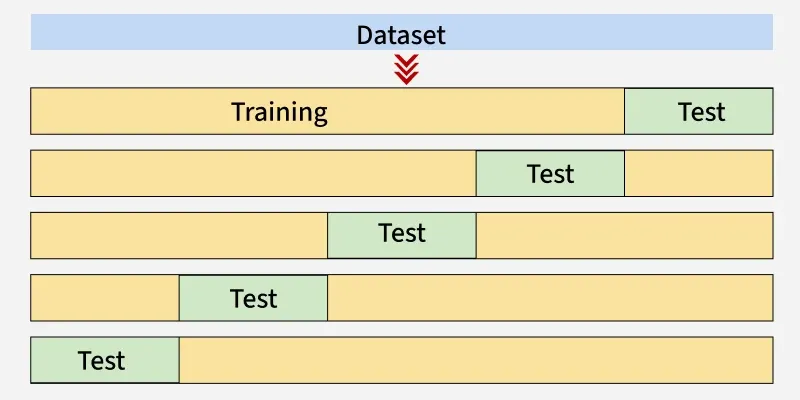


*   Here we will take k as 5.


*   **1st iteration**: The first 20% of data [1–5] is used for testing and the remaining 80% [6–25] is used for training.

*  **2nd iteration**: The second 20% [6–10] is used for testing and the remaining data [1–5] and [11–25] is used for training.



*   This process continues until each fold has been used once as the test set.










In [ ]:
#Using HoldOut Method
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 120
Testing set size: 30


In [ ]:
#Using K-Fold cross Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kfold)

print("Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())

Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Average CV Score: 0.9533333333333335


# 2. Evaluation Metrics for Classification Tasks
Classification models assign inputs to predefined labels. Their performance can be measured using accuracy, precision, recall, F1 score, confusion matrix and AUC-ROC.



## a) Confusion Matrix


*  **True Positive (TP)**: The model correctly predicted a positive outcome i.e the actual outcome was positive.


*   **True Negative (TN)**: The model correctly predicted a negative outcome i.e the actual outcome was negative.


*   **False Positive (FP)**: The model incorrectly predicted a positive outcome i.e the actual outcome was negative. It is also known as a Type I error.

*   **False Negative (FN)**: The model incorrectly predicted a negative outcome i.e the actual outcome was positive. It is also known as a Type II error.


*   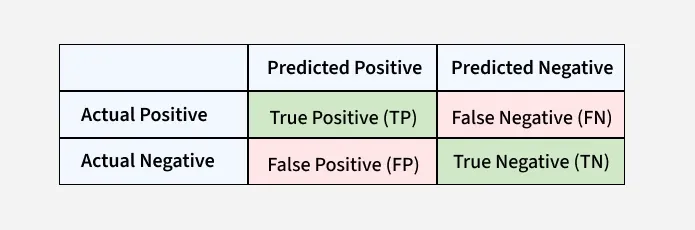





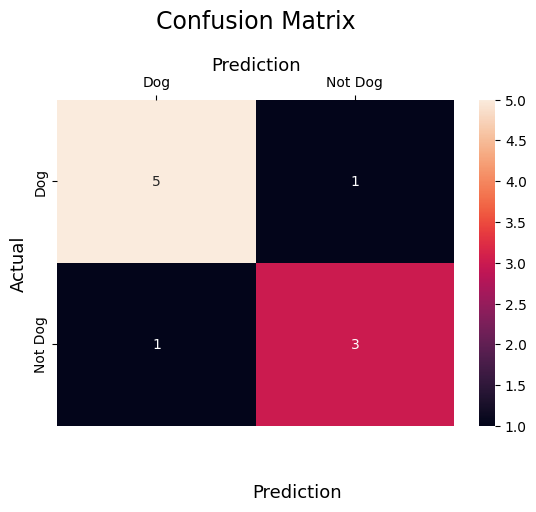

In [ ]:
#Step 1: Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
#Step 2: Create the NumPy array for actual and predicted labels
actual    = np.array(
  ['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(
  ['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])
#Step 3: Compute the confusion matrix
cm = confusion_matrix(actual,predicted)
sns.heatmap(cm, annot=True,fmt='g', xticklabels=['Dog','Not Dog'],yticklabels=['Dog','Not Dog'])

plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [ ]:
#Step 5: Classifications Report based on Confusion Metrics
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

         Dog       0.83      0.83      0.83         6
     Not Dog       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



## b) Precision
Precision is the ratio between the True Positives and all the Positives. It shows how many of the “yes” predictions made by the model were actually correct. It helps us reduce wrong “yes” guesses which are called false positives (FP).






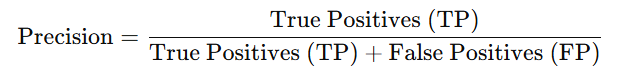

### Example:
Imagine you build a model to find birds in photos. It marks some photos as "bird."

If those marked photos really have birds that’s good (true positives).
But if some don’t have birds the model made a mistake (false positives).


*   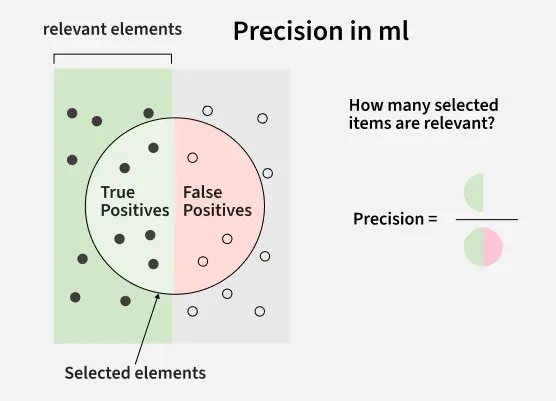

## Advantages of High Precision
 A model with high precision is very good at avoiding mistakes when it says “yes.” This is important in situations where false alarms are a big problem.

### For example:


*   In spam email detection it's better if real emails don't get wrongly marked as spam.

*   We care more about getting the important emails right than stopping every single spam message.
* So in these cases a model that gives fewer wrong "yes" answers is more useful.




## Limitations of Precision



*   If we only care about precision then model may miss some real cases. It becomes too careful and may say “no” even when something is actually “yes.”

*   If the model is too focused on being precise it might let lots of spam emails into your inbox because it's afraid of wrongly marking a real email as spam.

# c) Accuracy


*   Accuracy refers to how close a measurement is to the true value. It's about being correct.
*   In physics, accuracy refers to how close a measured value is to the true or accepted value of a physical quantity.
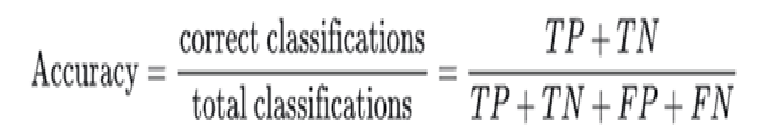

### Accuracy:
* The average of the measurements is calculated by adding all the results together and dividing by the number of measurements:
* Average = (99.8 + 100.1 + 100.0 + 99.9 + 100.2) /5​ = 100.0°C



* This average exactly matches the known boiling point of water, showing that the measurements are highly accurate. Accuracy here reflects how close the measurements are to the true or accepted value.



### Precision:
Precision relates to the repeatability of measurements and how close the series of results are to each other. The range of measurements from 99.8°C to 100.2°C shows very tight clustering around the average. This indicates that the chemist's measurements are consistently precise..


## d) Recall
Recall tells us how well a model finds all the correct “yes” cases in the data. It checks how many real positive cases the model was able to correctly identify.

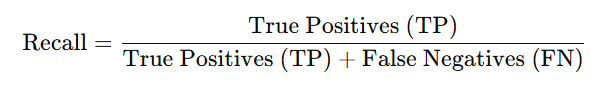

*   True Positives (TP): The model correctly said “yes.”

*   False Negatives (FN): The model missed a real “yes” and said “no” instead.
Imagine a computer model that looks for birds in pictures.
### Example:
Recall tells us how many real birds the model found correctly.
A perfect model would find all birds with no misses that means no false negatives.


*   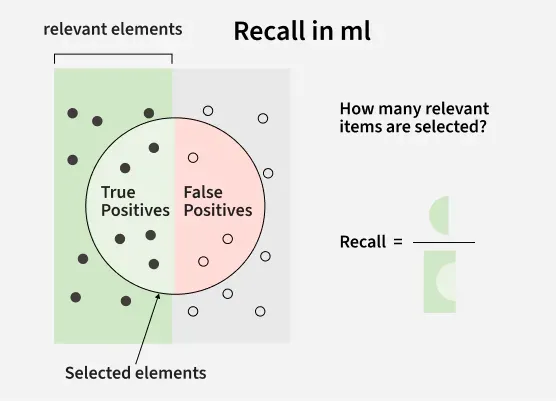


## Uses of Recall
You use recall when it’s very important to find all possible positive cases even if some of them turn out to be wrong.
### For example:


*   In medical tests you want to catch every possible patient who may be sick even if that means a few healthy people are wrongly flagged.

*   In fraud detection it’s better to check a few extra normal transactions than to miss a real fraud.



## Advantages of High Recall


*   A model with high recall is very good at not missing anything important. It finds almost all the actual “yes” cases in the data.
*    This is helpful when Missing a real case is dangerous or costly.
### For example
In cybersecurity missing an attack is worse than accidentally flagging something safe.


## Limitations of Recall

*   Focusing only on recall means the model is optimized to identify as many actual positives as possible even at the cost of incorrectly labeling negatives as positives.
*   This often leads to a high number of false positives.









In [2]:
#Step 1: Importing Libraries, Loading Dataset, Splitting Dataset
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=20
)
#Step 2: Training Model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [3]:
#accuracy_score: computes the proportion of correct predictions.
print("Accuracy:", accuracy_score(y_test, y_pred))
#Precision: Precision measures how many predicted positives are actually positive.
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
#Recall: Recall measures how many actual positives are correctly predicted.
print("Recall:", recall_score(y_test, y_pred, average="weighted"))


Accuracy: 0.9333333333333333
Precision: 0.9435897435897436
Recall: 0.9333333333333333


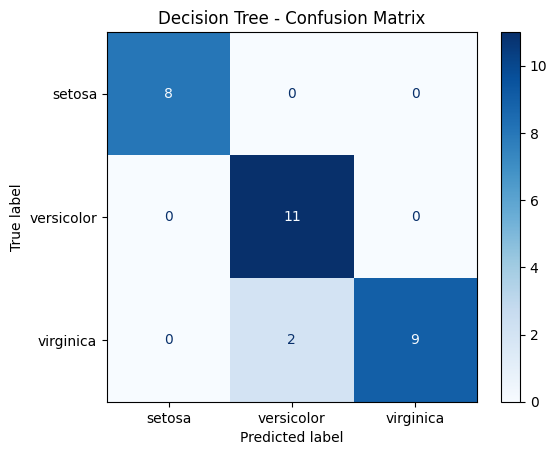

In [4]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# e) F1 Score



*   F1 Score is a performance metric used in machine learning to evaluate how well a classification model performs on a dataset especially when the classes are imbalanced meaning one class appears much more frequently than another.

*   Now the F1 Score combines precision and recall using the harmonic mean:

*   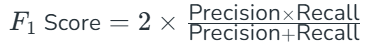





*   The F1 Score is the harmonic mean of precision and recall. It is useful when we need a balance between precision and recall as it combines both into a single number.
*   A high F1 score means the model performs well on both metrics. Its range is [0,1].

*   Lower recall and higher precision gives us great accuracy but then it misses a large number of instances.
*   More the F1 score better will be performance.






In [5]:
print("F1 score:", f1_score(y_test, y_pred, average="weighted"))

F1 score: 0.9327777777777778


# f) AUC, ROC

*   AUC-ROC curve is a graph used to check how well a binary classification model works.
*    It shows how good the model is at telling the difference between the two classes by plotting.


## *   True Positive Rate (TPR):
how often the model correctly predicts the positive cases also known as Sensitivity or Recall.


## *   False Positive Rate (FPR):
how often the model incorrectly predicts a negative case as positive.

## *   Specificity:
 measures the proportion of actual negatives that the model correctly identifies. It is calculated as 1 - FPR.


*   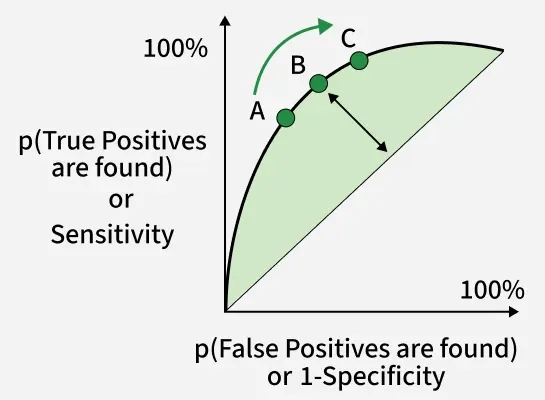








## ROC Curve :

*   The Receiver Operating Characteristic (ROC) curve is a fundamental tool in the field of machine learning for evaluating the performance of classification models.
*  It plots **TPR** vs. **FPR** at different thresholds. It represents the trade-off between the **sensitivity** and **specificity** of a classifier.


*   **TPR** = TP/(TP+FN)
*   **FPR** = FP/(FP+TN)

# AUC(Area Under the Curve):


*   measures the area under the ROC curve. A higher AUC value indicates better model performance as it suggests a greater ability to distinguish between classes.
*   An AUC value of 1.0 indicates perfect performance while 0.5 suggests it is random guessing.


*  This helps us to assess how well a regression model has fitted the data. The AUC (Area under Curve) of this ROC curve helps us to determine the specificity and sensitivity of the model.


*   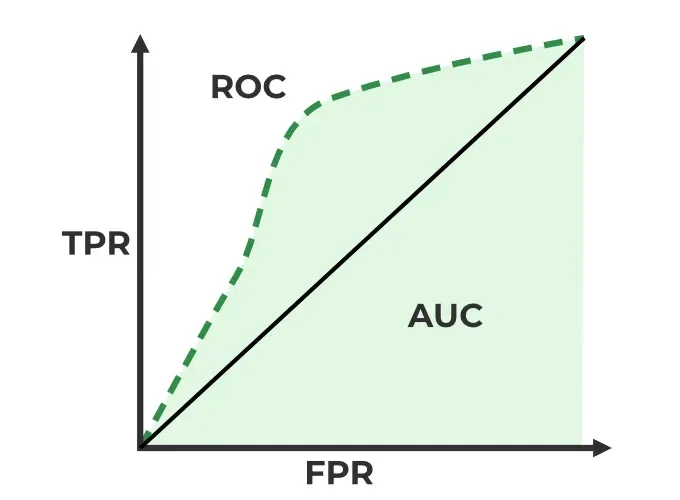









In [6]:
#Step 1: Importing the required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
#Step 2: Loading the dataset
data = load_breast_cancer()
X = data.data
y = data.target # Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#Step 3: Training and testing the model
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

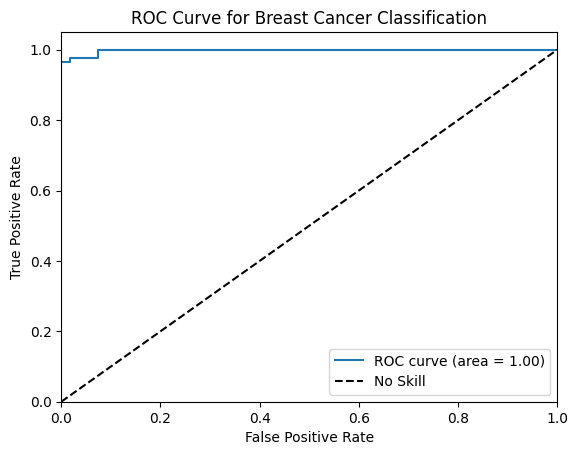

In [7]:
# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
#Step 4: Plot the ROC Curve
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

## Implementation using two different models

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
# Generating data and splitting data
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
#Training the different models
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

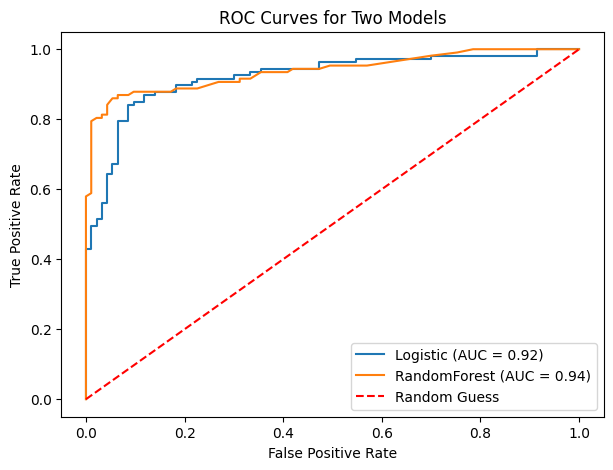

In [9]:
#Predictions
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]
#Creating a dataframe
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic, 'RandomForest': y_pred_rf})
#Plotting ROC Curve for models
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()